In [2]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# data_true = pd.read_csv('2021D1.csv')
# data_false = pd.read_csv('OtherD1.csv')

In [4]:
# data_true['Label'] = 0
# data_false['Label'] = 1
# data = pd.concat([data_true,data_false], ignore_index=True)
# data = data.drop(columns='Unnamed: 0')
# data = data.sample(frac=1, ignore_index=True)

In [5]:
data = pd.read_csv('data.csv')
data = data.drop(columns='Unnamed: 0')
data

,0,1,2,3,4,5,6,7,8,9,...,9991,9992,9993,9994,9995,9996,9997,9998,9999,Label
0,14.70,24.65,12.95,14.95,12.80,12.25,20.25,13.95,16.25,25.05,...,21.85,24.45,15.35,8.50,17.90,20.40,8.85,20.95,17.40,1
1,10.75,21.60,13.70,14.80,19.10,18.60,17.35,17.40,25.40,22.55,...,17.10,24.60,24.50,16.85,18.95,23.25,20.20,26.15,16.95,0
2,12.25,26.45,25.85,23.65,24.00,21.85,16.60,16.80,24.05,19.25,...,16.30,25.20,21.70,17.20,25.20,13.60,19.65,24.00,25.90,0
3,21.50,21.30,20.05,23.75,16.20,13.60,22.55,16.50,18.05,17.15,...,16.95,15.25,19.40,18.60,22.85,16.35,23.75,23.15,23.85,0
4,19.20,23.55,23.90,15.80,11.30,16.75,13.05,19.05,20.80,24.50,...,25.25,10.45,13.95,22.70,20.85,22.20,19.30,18.50,22.70,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,20.15,25.80,17.40,25.55,12.75,15.65,10.45,21.45,19.05,18.00,...,17.90,21.65,22.45,19.20,21.70,24.90,22.70,22.40,14.80,0
696,20.10,21.20,16.40,18.50,14.55,25.05,26.45,14.20,23.15,21.95,...,17.80,22.00,23.85,27.20,21.80,16.90,26.75,19.95,14.85,0
697,14.70,23.60,10.35,26.00,22.30,23.10,22.65,11.45,24.10,15.70,...,26.50,18.80,12.55,18.10,22.25,15.00,19.50,13.05,13.90,0
698,15.70,18.70,17.45,18.45,10.65,21.45,22.85,17.35,18.00,19.75,...,13.20,15.30,20.75,17.65,17.20,15.70,21.25,18.10,21.30,0


In [6]:
# data.to_csv('data.csv')

In [7]:
data_distribution = data.drop(columns=['Label'])

In [9]:
from psi import calculate_psi
from psi import get_breakpoint

In [10]:
breakpoints = get_breakpoint(data_distribution.loc[0], buckettype='bins', buckets=10)
psi_list = []
false_index = []
for i in range(699):
    psi = calculate_psi(expected=data_distribution.loc[i], actual=data_distribution.loc[i+1], breakpoints=breakpoints)
    psi_list.append(psi)
    if psi > 0.1:
        false_index.append(i)

<AxesSubplot:xlabel='0', ylabel='Density'>

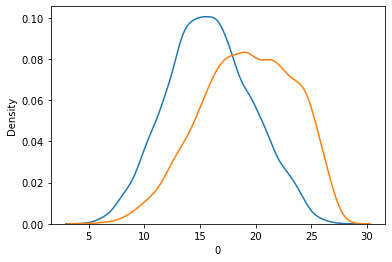

In [11]:
sns.kdeplot(data_distribution.loc[0])
sns.kdeplot(data_distribution.loc[1])

In [12]:
false_index

[0,
 6,
 8,
 15,
 16,
 22,
 23,
 32,
 33,
 54,
 55,
 90,
 91,
 104,
 105,
 110,
 111,
 123,
 124,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 150,
 151,
 168,
 169,
 188,
 189,
 207,
 208,
 220,
 221,
 222,
 228,
 229,
 238,
 239,
 240,
 253,
 254,
 263,
 264,
 275,
 277,
 278,
 279,
 293,
 294,
 298,
 299,
 301,
 302,
 309,
 310,
 311,
 312,
 315,
 316,
 329,
 330,
 332,
 334,
 335,
 337,
 338,
 343,
 344,
 363,
 364,
 372,
 373,
 381,
 382,
 393,
 394,
 404,
 405,
 407,
 408,
 413,
 414,
 435,
 436,
 474,
 475,
 487,
 488,
 506,
 507,
 517,
 519,
 520,
 521,
 544,
 545,
 550,
 551,
 553,
 561,
 562,
 566,
 567,
 568,
 569,
 580,
 581,
 583,
 584,
 592,
 605,
 606,
 654,
 655,
 664,
 665,
 674,
 675,
 681,
 682,
 686,
 687]

In [13]:
len(false_index)

125

<AxesSubplot:xlabel='6', ylabel='Density'>

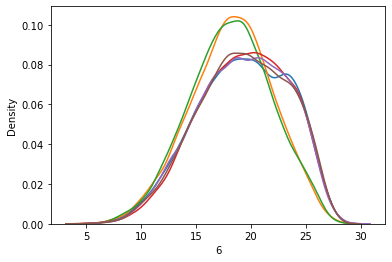

In [14]:
sns.kdeplot(data_distribution.loc[6])
sns.kdeplot(data_distribution.loc[7])
sns.kdeplot(data_distribution.loc[8])
sns.kdeplot(data_distribution.loc[9])
sns.kdeplot(data_distribution.loc[10])
sns.kdeplot(data_distribution.loc[5])

In [15]:
data['Label'].loc[0:10]

0     1
1     0
2     0
3     0
4     0
5     0
6     0
7     1
8     1
9     0
10    0
Name: Label, dtype: int64

In [16]:
Truth_False_index = []
for i in range(699):
    if data['Label'].loc[i]|data['Label'].loc[i+1] == 1:
        Truth_False_index.append(i)

In [17]:
Truth_False_index

[0,
 6,
 7,
 8,
 15,
 16,
 22,
 23,
 32,
 33,
 54,
 55,
 90,
 91,
 104,
 105,
 110,
 111,
 123,
 124,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 150,
 151,
 168,
 169,
 188,
 189,
 207,
 208,
 220,
 221,
 222,
 228,
 229,
 238,
 239,
 240,
 253,
 254,
 263,
 264,
 275,
 276,
 277,
 278,
 279,
 293,
 294,
 298,
 299,
 301,
 302,
 309,
 310,
 311,
 312,
 315,
 316,
 329,
 330,
 331,
 332,
 334,
 335,
 337,
 338,
 343,
 344,
 363,
 364,
 372,
 373,
 381,
 382,
 393,
 394,
 404,
 405,
 407,
 408,
 413,
 414,
 435,
 436,
 474,
 475,
 487,
 488,
 506,
 507,
 517,
 518,
 519,
 520,
 521,
 544,
 545,
 550,
 551,
 552,
 553,
 561,
 562,
 566,
 567,
 568,
 569,
 580,
 581,
 583,
 584,
 592,
 593,
 605,
 606,
 654,
 655,
 664,
 665,
 674,
 675,
 681,
 682,
 686,
 687]

In [18]:
len(Truth_False_index)

131

In [19]:
True_predict = list(set(Truth_False_index) & set(false_index))
True_predict.sort()
True_predict

[0,
 6,
 8,
 15,
 16,
 22,
 23,
 32,
 33,
 54,
 55,
 90,
 91,
 104,
 105,
 110,
 111,
 123,
 124,
 129,
 130,
 131,
 132,
 133,
 134,
 135,
 150,
 151,
 168,
 169,
 188,
 189,
 207,
 208,
 220,
 221,
 222,
 228,
 229,
 238,
 239,
 240,
 253,
 254,
 263,
 264,
 275,
 277,
 278,
 279,
 293,
 294,
 298,
 299,
 301,
 302,
 309,
 310,
 311,
 312,
 315,
 316,
 329,
 330,
 332,
 334,
 335,
 337,
 338,
 343,
 344,
 363,
 364,
 372,
 373,
 381,
 382,
 393,
 394,
 404,
 405,
 407,
 408,
 413,
 414,
 435,
 436,
 474,
 475,
 487,
 488,
 506,
 507,
 517,
 519,
 520,
 521,
 544,
 545,
 550,
 551,
 553,
 561,
 562,
 566,
 567,
 568,
 569,
 580,
 581,
 583,
 584,
 592,
 605,
 606,
 654,
 655,
 664,
 665,
 674,
 675,
 681,
 682,
 686,
 687]

In [20]:
len(True_predict)

125

In [21]:
acc = len(True_predict)/len(Truth_False_index)
acc

0.9541984732824428

<AxesSubplot:>

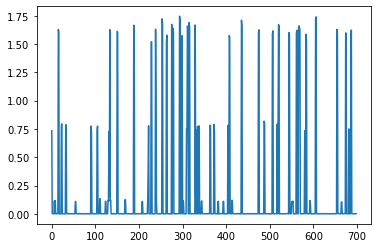

In [22]:
sns.lineplot(x = [i for i in range(699)], y = psi_list)

In [23]:
psi_list

[0.7356349997993997,
 0.0025734163104612325,
 0.0028335466419340256,
 0.0016731567194911041,
 0.001471438125937325,
 0.0029190826308541718,
 0.1156825318576873,
 0.002433879038436166,
 0.11688324043161379,
 0.0024544919535730314,
 0.0008065641732898835,
 0.0035149255075289714,
 0.0024000105129256284,
 0.0021722484843854613,
 0.0025479469590320384,
 1.6292859987464816,
 1.608744973765573,
 0.0003763389792117004,
 0.000576753548121954,
 0.0017012659811780854,
 0.0005719309857502863,
 0.0013707119193186582,
 0.7800593300916064,
 0.794636730760402,
 0.0007316437020333526,
 0.0006257414376968206,
 0.0017353682595383003,
 0.001818152088267012,
 0.0013945047558675096,
 0.0008284432190065508,
 0.00034722481116475107,
 0.0017401739946560626,
 0.788065299606634,
 0.7831789801095216,
 0.0024039982862789216,
 0.001450140951248706,
 0.002637630842080593,
 0.0032670670975123465,
 0.0026172115277051456,
 0.0017621914481896904,
 0.002890952775654908,
 0.0020420114078014448,
 0.0016521839149223035,
 0.

0.1156825318576873


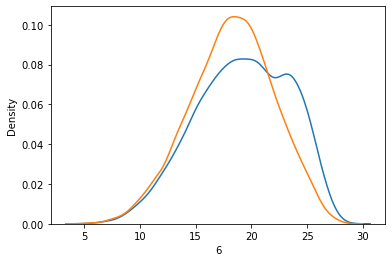

In [24]:
sns.kdeplot(data_distribution.loc[6])
sns.kdeplot(data_distribution.loc[7])
print(psi_list[6])

0.002433879038436166


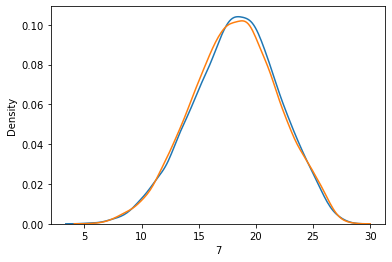

In [25]:
sns.kdeplot(data_distribution.loc[7])
sns.kdeplot(data_distribution.loc[8])
print(psi_list[7])

0.11688324043161379


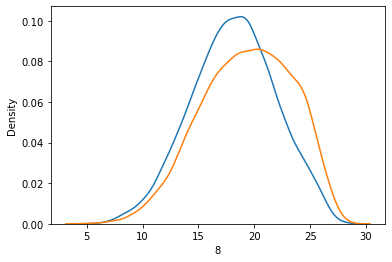

In [26]:
sns.kdeplot(data_distribution.loc[8])
sns.kdeplot(data_distribution.loc[9])
print(psi_list[8])